In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Breast_GSE45827.csv')

In [3]:
df.head()

samples   type  1007_s_at   1053_at    117_at    121_at  1255_g_at  \
0       84  basal   9.850040  8.097927  6.424728  7.353027   3.029122   
1       85  basal   9.861357  8.212222  7.062593  7.685578   3.149468   
2       87  basal  10.103478  8.936137  5.735970  7.687822   3.125931   
3       90  basal   9.756875  7.357148  6.479183  6.986624   3.181638   
4       91  basal   9.408330  7.746404  6.693980  7.333426   3.169923   

    1294_at   1316_at   1320_at  ...  AFFX-r2-Ec-bioD-3_at  \
0  6.880079  4.963740  4.408328  ...             12.229711   
1  7.542283  5.129607  4.584418  ...             12.178531   
2  6.562369  4.813449  4.425195  ...             12.125108   
3  7.802344  5.490982  4.567956  ...             12.111235   
4  7.610457  5.372469  4.424426  ...             12.173642   

   AFFX-r2-Ec-bioD-5_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  \
0             11.852955            13.658701            13.477698   
1             11.809408            13.750086            13.470146   
2             11.725766            13.621732            13.295080   
3             11.719215            13.743108            13.508861   
4             11.861296            13.797774            13.542206   

   AFFX-ThrX-3_at  AFFX-ThrX-5_at  AFFX-ThrX-M_at  AFFX-TrpnX-3_at  \
0        6.265781        5.016196        4.901594         2.966657   
1        6.771853        5.291005        5.405839         2.934763   
2        6.346952        5.171403        5.184286         2.847684   
3        6.610284        5.193356        5.086569         3.031602   
4        6.414354        5.040202        5.235318         2.956232   

   AFFX-TrpnX-5_at  AFFX-TrpnX-M_at  
0         3.508495         3.301999  
1         3.687666         3.064299  
2         3.550597         3.158535  
3         3.524981         3.272665  
4         3.445501         3.193947  

[5 rows x 54677 columns]

In [5]:
df['type'].unique()

array(['basal', 'HER', 'cell_line', 'normal', 'luminal_A', 'luminal_B'],
      dtype=object)

In [6]:
y = df['type']
x = df.drop(['samples','type'],axis=1)

We will attempt to solve this using a random forest classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3)

In [22]:
bestModel = None
bestAccu = 0
bestFeatureCount = 0
for i in range(10,100):
    m=10*i
    clf = RandomForestClassifier(max_depth=m)
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    if score > bestAccu:
        bestAccu = score
        bestModel = clf
        bestFeatureCount = m
print('Best Score: ' + str(bestAccu))
print(bestFeatureCount)

Best Score: 0.9782608695652174
120


1007_s_at   1053_at    117_at    121_at  1255_g_at   1294_at   1316_at  \
0     9.850040  8.097927  6.424728  7.353027   3.029122  6.880079  4.963740   
1     9.861357  8.212222  7.062593  7.685578   3.149468  7.542283  5.129607   
2    10.103478  8.936137  5.735970  7.687822   3.125931  6.562369  4.813449   
3     9.756875  7.357148  6.479183  6.986624   3.181638  7.802344  5.490982   
4     9.408330  7.746404  6.693980  7.333426   3.169923  7.610457  5.372469   
..         ...       ...       ...       ...        ...       ...       ...   
146  10.392638  7.334408  6.848586  7.020486   3.228065  7.815439  5.448470   
147  10.930875  8.415294  5.906827  7.753572   3.270557  7.367931  5.906849   
148  11.027098  7.180876  6.304736  7.641197   3.206950  8.569296  5.823146   
149  10.444395  7.525153  5.964460  7.825939   3.384147  7.268454  5.245072   
150  11.345817  7.379299  5.891172  7.394586   3.183420  7.792885  5.355978   

      1320_at  1405_i_at   1431_at  ...  AFFX-r2-Ec-bioD-3_at  \
0    4.408328   8.870780  3.278896  ...             12.229711   
1    4.584418   7.767646  3.589636  ...             12.178531   
2    4.425195   9.417956  3.552253  ...             12.125108   
3    4.567956   9.022345  3.312473  ...             12.111235   
4    4.424426   9.400056  3.368243  ...             12.173642   
..        ...        ...       ...  ...                   ...   
146  4.496955   8.015534  4.126711  ...             12.638556   
147  5.194349   8.248133  3.735215  ...             12.523507   
148  4.617309   7.523521  3.718392  ...             12.256767   
149  5.088004   7.364773  4.148290  ...             12.321900   
150  4.457914   7.782413  4.877128  ...             12.126110   

     AFFX-r2-Ec-bioD-5_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  \
0               11.852955            13.658701            13.477698   
1               11.809408            13.750086            13.470146   
2               11.725766            13.621732            13.295080   
3               11.719215            13.743108            13.508861   
4               11.861296            13.797774            13.542206   
..                    ...                  ...                  ...   
146             12.122129            14.331152            14.133976   
147             11.977970            14.285405            14.070989   
148             11.661126            14.149586            13.977076   
149             11.727694            14.186277            13.943521   
150             11.478893            14.070188            13.857547   

     AFFX-ThrX-3_at  AFFX-ThrX-5_at  AFFX-ThrX-M_at  AFFX-TrpnX-3_at  \
0          6.265781        5.016196        4.901594         2.966657   
1          6.771853        5.291005        5.405839         2.934763   
2          6.346952        5.171403        5.184286         2.847684   
3          6.610284        5.193356        5.086569         3.031602   
4          6.414354        5.040202        5.235318         2.956232   
..              ...             ...             ...              ...   
146        8.495888        4.971727        6.209136         2.852852   
147        8.193182        6.528948        7.108210         2.929800   
148        8.351331        6.882504        7.329545         3.085127   
149        7.927210        6.839086        7.089259         3.018525   
150        7.992141        5.661898        6.460331         3.061585   

     AFFX-TrpnX-5_at  AFFX-TrpnX-M_at  
0           3.508495         3.301999  
1           3.687666         3.064299  
2           3.550597         3.158535  
3           3.524981         3.272665  
4           3.445501         3.193947  
..               ...              ...  
146         3.697448         3.333289  
147         3.833289         3.213893  
148         3.628848         3.215807  
149         3.770597         3.102298  
150         3.857525         3.129827  

[151 rows x 54675 columns]

In [23]:
import umap

In [27]:
labels = pd.Categorical(y_train).codes

In [29]:
trans = umap.UMAP(n_neighbors=10).fit(x_train)

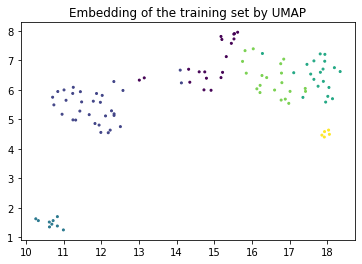

In [33]:
plt.scatter(trans.embedding_[:,0], trans.embedding_[:,1], s=4, c=labels)
plt.title("Embedding of the training set by UMAP")
plt.show()

In [35]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [46]:
svc_noUMAP = SVC().fit(x_train, y_train)
knn_noUMAP = KNeighborsClassifier().fit(x_train, y_train)
svc_noUMAP.score(x_test, y_test), knn_noUMAP.score(x_test, y_test)

(0.717391304347826, 0.8043478260869565)

In [53]:
bestsvc = None
bestknn = None
bestknn_n = None
bestknn_d = None
bestsvc_n = None
bestsvc_d = None
bestsvc_score = 0
bestknn_score = 0
for n in [3,4,8,16,32,64]:
    for d in [2,3,7,15]:
        if n > d:
            trans = umap.UMAP(n_neighbors=n,n_components=d).fit(x_train)
            test_embedding = trans.transform(x_test)
            svc = SVC().fit(trans.embedding_, y_train)
            knn = KNeighborsClassifier().fit(trans.embedding_, y_train)
            svc_score = svc.score(test_embedding, y_test)
            knn_score = knn.score(test_embedding, y_test)
            if svc_score > bestsvc_score:
                bestsvc_score = svc_score
                bestsvc_n = n
                bestsvc_d = d
                bestsvc = svc
                bestsvc_trans = trans
            if knn_score > bestknn_score:
                bestknn_score = knn_score
                bestknn_n = n
                bestknn_d = d
                bestknn = knn
                bestknn_trans = trans

In [54]:
print('SVC')
print('Best score: ' + str(bestsvc_score))
print('Best n: ' + str(bestsvc_n))
print('Best d: ' + str(bestsvc_d))
print('KNN')
print('Best score: ' + str(bestknn_score))
print('Best n: ' + str(bestknn_n))
print('Best d: ' + str(bestknn_d))

SVC
Best score: 0.8478260869565217
Best n: 3
Best d: 2
KNN
Best score: 0.9130434782608695
Best n: 16
Best d: 2


Here we see that using UMAP did increase the accuracy of both tests, however, niether one of these methods displayed here worked as well as the Random Forest Classifier. 